# Entrenamiento de Modelos - Severidad de Siniestros Actuariales

**Objetivo**: Entrenar y evaluar modelos de Machine Learning para predecir el costo de siniestros.

**Modelos a probar**:
- Linear Regression (baseline)
- Random Forest Regressor  
- Gradient Boosting Regressor
- XGBoost Regressor (opcional)

**Métricas de evaluación**:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE) 
- R² Score
- Mean Absolute Percentage Error (MAPE)

In [1]:
# Celda 1: Importaciones y configuración
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os
import sys
from pathlib import Path

# Añadir la ruta del proyecto para importar módulos
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.data.make_dataset import generate_sample_data
from src.features.build_features import create_insurance_features, create_feature_pipeline, prepare_data

# Configuración
RANDOM_STATE = 42
CV_FOLDS = 5

print("✅ Configuración completada")

✅ Configuración completada


In [2]:
# Celda 2: Cargar datos procesados
print("📊 Cargando datos procesados...")

# Cargar los datos guardados en la fase anterior
processed_data = joblib.load('../data/processed/processed_data.pkl')

X_train = processed_data['X_train']
X_test = processed_data['X_test'] 
y_train = processed_data['y_train']
y_test = processed_data['y_test']
feature_names = processed_data['feature_names']

print("✅ Datos cargados correctamente")
print(f"📐 Conjunto de entrenamiento: {X_train.shape}")
print(f"📐 Conjunto de prueba: {X_test.shape}")
print(f"📋 Número de características: {len(feature_names)}")

📊 Cargando datos procesados...
✅ Datos cargados correctamente
📐 Conjunto de entrenamiento: (800, 20)
📐 Conjunto de prueba: (200, 20)
📋 Número de características: 20


In [3]:
# Celda 3: Definir modelos y métricas
print("🔧 Configurando modelos y métricas...")

# Lista de modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=RANDOM_STATE)
}

# Métricas de evaluación
def calculate_metrics(y_true, y_pred):
    """
    Calcula múltiples métricas de regresión.
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'MAE': mae,
        'RMSE': rmse, 
        'R2': r2,
        'MAPE': mape
    }

print("✅ Modelos y métricas configurados")

🔧 Configurando modelos y métricas...
✅ Modelos y métricas configurados


In [4]:
# Celda 4: Entrenamiento y evaluación inicial
print("🎯 Entrenamiento y evaluación de modelos...")

results = {}

for name, model in models.items():
    print(f"\n--- Entrenando {name} ---")
    
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    
    results[name] = {
        'model': model,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }
    
    print(f"✅ {name} entrenado")
    print(f"   Train R²: {train_metrics['R2']:.4f}, Test R²: {test_metrics['R2']:.4f}")
    print(f"   Train MAE: {train_metrics['MAE']:.4f}, Test MAE: {test_metrics['MAE']:.4f}")

🎯 Entrenamiento y evaluación de modelos...

--- Entrenando Linear Regression ---
✅ Linear Regression entrenado
   Train R²: 0.0197, Test R²: -0.0238
   Train MAE: 0.6076, Test MAE: 0.6168

--- Entrenando Random Forest ---
✅ Random Forest entrenado
   Train R²: 0.8394, Test R²: -0.1299
   Train MAE: 0.2421, Test MAE: 0.6601

--- Entrenando Gradient Boosting ---
✅ Gradient Boosting entrenado
   Train R²: 0.2894, Test R²: -0.1095
   Train MAE: 0.5142, Test MAE: 0.6436


📊 Comparación de modelos...
📈 Resultados de comparación:
               Model  Train_R2  Test_R2  Train_MAE  Test_MAE  Train_RMSE  \
0  Linear Regression    0.0197  -0.0238     0.6076    0.6168      0.7725   
1      Random Forest    0.8394  -0.1299     0.2421    0.6601      0.3127   
2  Gradient Boosting    0.2894  -0.1095     0.5142    0.6436      0.6577   

   Test_RMSE  Train_MAPE  Test_MAPE  
0     0.7991      8.7317     8.8654  
1     0.8395      3.4733     9.3765  
2     0.8319      7.3734     9.1899  


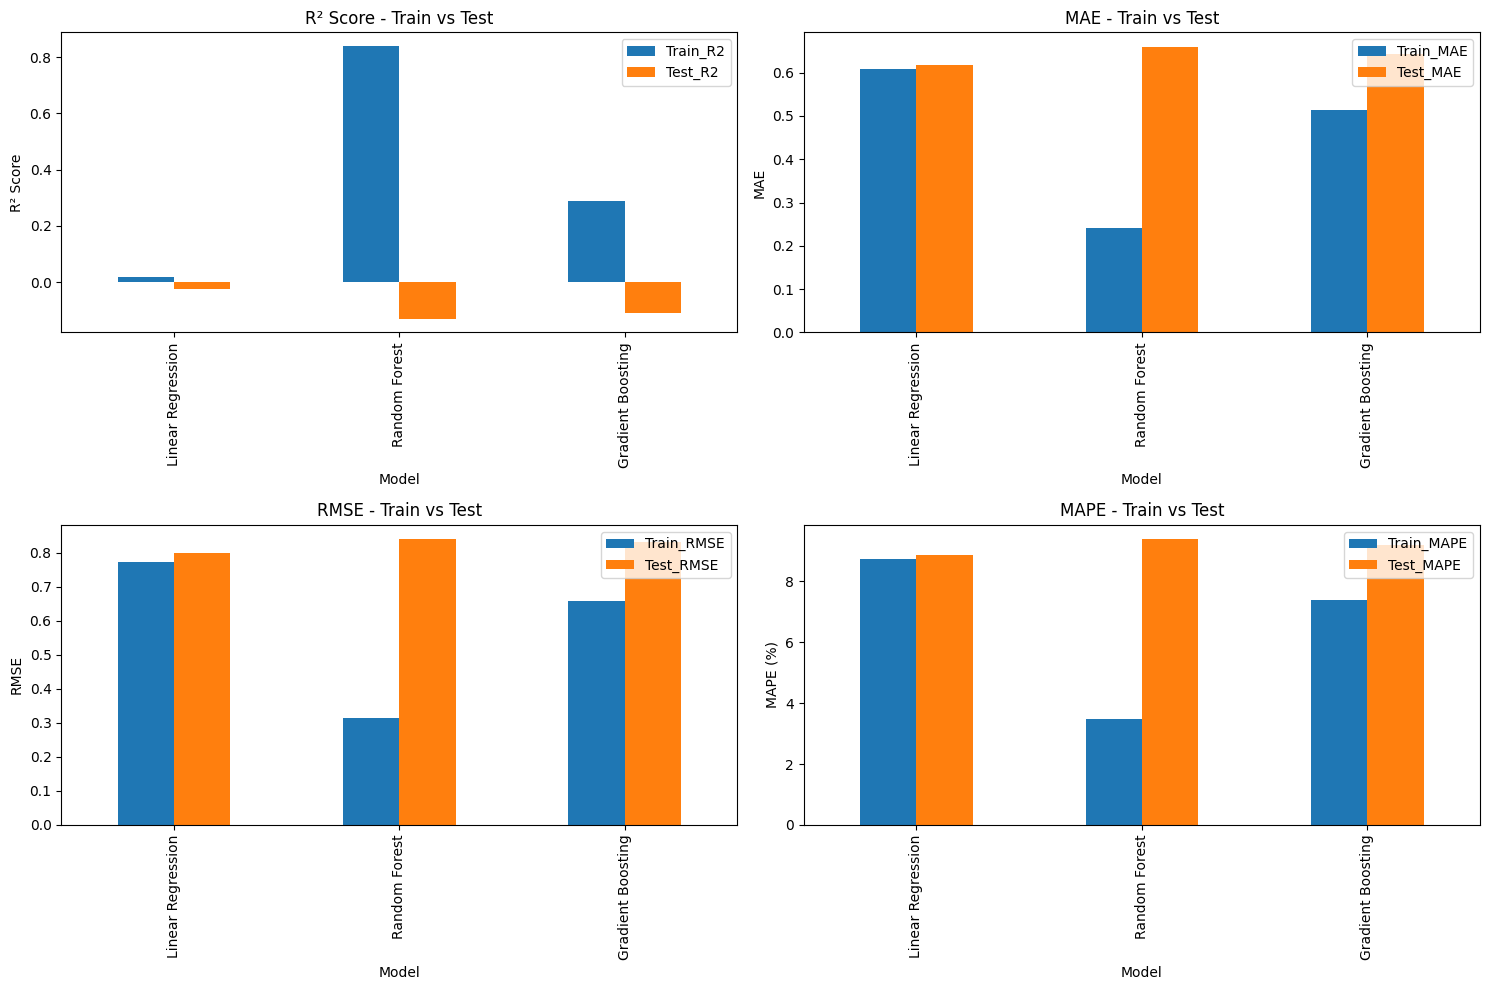

In [5]:
# Celda 5: Comparación de modelos
print("📊 Comparación de modelos...")

# Crear DataFrame con resultados
comparison_data = []
for name, result in results.items():
    train_metrics = result['train_metrics']
    test_metrics = result['test_metrics']
    
    comparison_data.append({
        'Model': name,
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_MAPE': train_metrics['MAPE'],
        'Test_MAPE': test_metrics['MAPE']
    })

df_comparison = pd.DataFrame(comparison_data)
print("📈 Resultados de comparación:")
print(df_comparison.round(4))

# Visualizar comparación
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² Score
df_comparison.set_index('Model')[['Train_R2', 'Test_R2']].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('R² Score - Train vs Test')
axes[0,0].set_ylabel('R² Score')

# MAE
df_comparison.set_index('Model')[['Train_MAE', 'Test_MAE']].plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('MAE - Train vs Test')
axes[0,1].set_ylabel('MAE')

# RMSE
df_comparison.set_index('Model')[['Train_RMSE', 'Test_RMSE']].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('RMSE - Train vs Test')
axes[1,0].set_ylabel('RMSE')

# MAPE
df_comparison.set_index('Model')[['Train_MAPE', 'Test_MAPE']].plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('MAPE - Train vs Test')
axes[1,1].set_ylabel('MAPE (%)')

plt.tight_layout()
plt.show()

🎯 Validación cruzada de modelos...

--- Validación cruzada para Linear Regression ---
RMSE CV: 0.7954 (+/- 0.0813)

--- Validación cruzada para Random Forest ---
RMSE CV: 0.8262 (+/- 0.0721)

--- Validación cruzada para Gradient Boosting ---
RMSE CV: 0.8232 (+/- 0.0845)


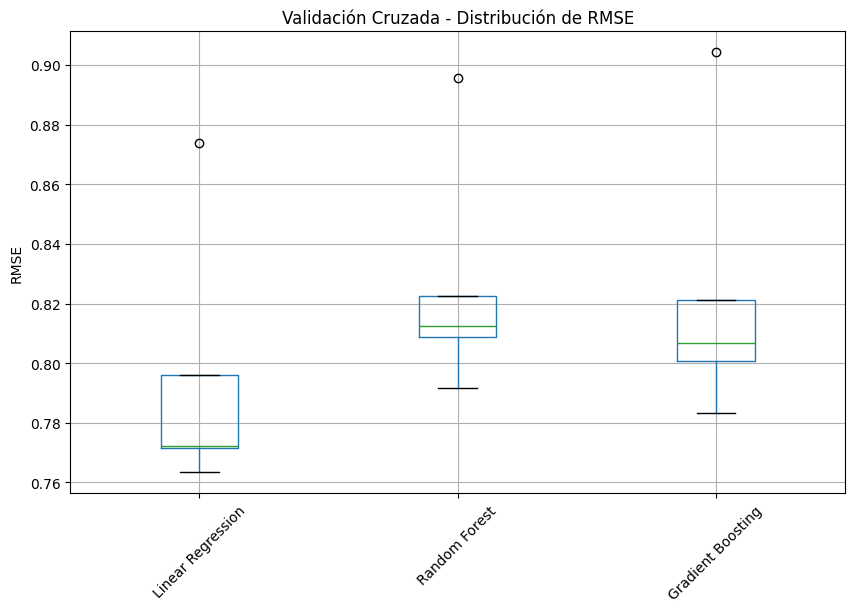

In [6]:
# Celda 6: Validación cruzada
print("🎯 Validación cruzada de modelos...")

cv_results = {}

for name, model in models.items():
    print(f"\n--- Validación cruzada para {name} ---")
    
    # Usar RMSE para validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, 
                               cv=CV_FOLDS, scoring='neg_root_mean_squared_error',
                               n_jobs=-1)
    
    cv_rmse = -cv_scores
    cv_results[name] = cv_rmse
    
    print(f"RMSE CV: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

# Visualizar resultados de CV
plt.figure(figsize=(10, 6))
cv_df = pd.DataFrame(cv_results)
cv_df.boxplot()
plt.title('Validación Cruzada - Distribución de RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Celda 7: Ajuste de hiperparámetros para el mejor modelo
print("🔧 Ajuste de hiperparámetros...")

# Seleccionar el mejor modelo basado en R² de prueba
best_model_name = max(results.items(), key=lambda x: x[1]['test_metrics']['R2'])[0]
print(f"🎯 Mejor modelo inicial: {best_model_name}")

# Hiperparámetros para Random Forest
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=RANDOM_STATE),
        param_grid,
        cv=CV_FOLDS,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"✅ Mejores parámetros: {best_params}")
    
# Hiperparámetros para Gradient Boosting
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'min_samples_split': [2, 5]
    }
    
    grid_search = GridSearchCV(
        GradientBoostingRegressor(random_state=RANDOM_STATE),
        param_grid,
        cv=CV_FOLDS,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"✅ Mejores parámetros: {best_params}")

else:
    # Para Linear Regression, no hay hiperparámetros que ajustar
    best_model = results[best_model_name]['model']
    best_params = "No hyperparameter tuning needed"
    print("ℹ️  Linear Regression - Sin ajuste de hiperparámetros")

🔧 Ajuste de hiperparámetros...
🎯 Mejor modelo inicial: Linear Regression
ℹ️  Linear Regression - Sin ajuste de hiperparámetros


In [8]:
# Celda 8: Evaluación del modelo optimizado
print("📊 Evaluando modelo optimizado...")

# Predecir con el modelo optimizado
y_train_pred_opt = best_model.predict(X_train)
y_test_pred_opt = best_model.predict(X_test)

# Calcular métricas optimizadas
train_metrics_opt = calculate_metrics(y_train, y_train_pred_opt)
test_metrics_opt = calculate_metrics(y_test, y_test_pred_opt)

print(f"🎯 Resultados del modelo optimizado ({best_model_name}):")
print(f"   Train R²: {train_metrics_opt['R2']:.4f}")
print(f"   Test R²: {test_metrics_opt['R2']:.4f}")
print(f"   Test MAE: {test_metrics_opt['MAE']:.4f}")
print(f"   Test RMSE: {test_metrics_opt['RMSE']:.4f}")
print(f"   Test MAPE: {test_metrics_opt['MAPE']:.4f}%")

# Comparar con el modelo original
if best_model_name in results:
    original_test_r2 = results[best_model_name]['test_metrics']['R2']
    improvement = test_metrics_opt['R2'] - original_test_r2
    print(f"📈 Mejora en R²: {improvement:.4f}")

📊 Evaluando modelo optimizado...
🎯 Resultados del modelo optimizado (Linear Regression):
   Train R²: 0.0197
   Test R²: -0.0238
   Test MAE: 0.6168
   Test RMSE: 0.7991
   Test MAPE: 8.8654%
📈 Mejora en R²: 0.0000


In [9]:
# Celda 9: Análisis de importancia de características
print("🔍 Analizando importancia de características...")

if hasattr(best_model, 'feature_importances_'):
    # Obtener importancia de características
    importances = best_model.feature_importances_
    
    # Crear DataFrame con importancias
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("📊 Top 10 características más importantes:")
    print(feature_importance_df.head(10))
    
    # Visualizar importancia de características
    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(15)
    
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importancia')
    plt.title('Top 15 Características Más Importantes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

else:
    print("ℹ️  El modelo no tiene atributo de importancia de características")

🔍 Analizando importancia de características...
ℹ️  El modelo no tiene atributo de importancia de características


In [10]:
# Celda 10: Guardar el modelo entrenado
print("💾 Guardando modelo entrenado...")

# Crear directorio si no existe
os.makedirs('../models', exist_ok=True)

# Guardar el modelo optimizado
model_path = '../models/best_model.pkl'
joblib.dump(best_model, model_path)

# Guardar los resultados del modelo
model_results = {
    'model_name': best_model_name,
    'best_params': best_params,
    'train_metrics': train_metrics_opt,
    'test_metrics': test_metrics_opt,
    'feature_names': feature_names,
    'model_version': '1.0.0',
    'timestamp': pd.Timestamp.now()
}

joblib.dump(model_results, '../models/model_results.pkl')

print("✅ Modelo guardado correctamente")
print(f"📁 Modelo: {model_path}")
print(f"📁 Resultados: ../models/model_results.pkl")

# Guardar también el preprocesador (por si acaso)
preprocessor = joblib.load('../models/preprocessor.pkl')
joblib.dump(preprocessor, '../models/preprocessor.pkl')

print("✅ Preprocesador guardado")

💾 Guardando modelo entrenado...
✅ Modelo guardado correctamente
📁 Modelo: ../models/best_model.pkl
📁 Resultados: ../models/model_results.pkl
✅ Preprocesador guardado
